<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:cyan;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Corona EDA 
</p>
</div>

### Importing required libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Loading data

In [17]:
df=pd.read_csv(r"C:\Users\aksh\Desktop\Blameet_m_data\data sets\latest Covid-19 India Status1.csv")

### Previwe of data

In [18]:
df.sample(5)

,State/UTs,Total Cases,Active,Deaths,Active Ratio (%),Death Ratio (%)
4,Andhra Pradesh,1911231,32356,12919,1.69,0.68
15,Telengana,629054,11472,3710,1.82,0.59
19,Uttarakhand,340959,1506,7338,0.44,2.15
0,Maharashtra,6122893,117869,123857,1.93,2.02
8,Chhattisgarh,996689,5017,13464,0.50,1.35


#### Checking the data range

In [19]:
df.shape

(36, 6)

#### Checking columns

In [20]:
df.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Deaths', 'Active Ratio (%)',
       'Death Ratio (%)'],
      dtype='object')

#### Checking the info()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State/UTs         36 non-null     object 
 1   Total Cases       36 non-null     int64  
 2   Active            36 non-null     int64  
 3   Deaths            36 non-null     int64  
 4   Active Ratio (%)  36 non-null     float64
 5   Death Ratio (%)   36 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ KB


#### Checking uniques

In [22]:
AA=set(list(map(lambda x:x[0],df["State/UTs"])))

In [23]:
for j in AA:
    print([i for i in df["State/UTs"] if i.startswith(j or j.lower())])

['Kerala', 'Karnataka']
['Bihar']
['Ladakh', 'Lakshadweep']
['Punjab', 'Puducherry']
['West Bengal']
['Chhattisgarh', 'Chandigarh']
['Andhra Pradesh', 'Assam', 'Arunachal Pradesh', 'Andaman and Nicobar']
['Jharkhand', 'Jammu and Kashmir']
['Rajasthan']
['Odisha']
['Haryana', 'Himachal Pradesh']
['Tamil Nadu', 'Telengana', 'Tripura']
['Nagaland']
['Maharashtra', 'Madhya Pradesh', 'Manipur', 'Meghalaya', 'Mizoram']
['Sikkim']
['Uttar Pradesh', 'Uttarakhand']
['Gujarat', 'Goa']
['Delhi', 'Dadra and Nagar Haveli and Daman and Diu']


### Descriptive stat

In [24]:
df.describe()

,Total Cases,Active,Deaths,Active Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,8.530432e+05,13657.111111,11250.777778,2.586667,1.253889
std,1.223486e+06,27065.893597,21412.276037,3.728932,0.565298
min,7.491000e+03,14.000000,4.000000,0.060000,0.040000
25%,5.951300e+04,1033.250000,782.500000,0.227500,0.930000
50%,4.353345e+05,1966.500000,4550.500000,1.130000,1.315000
75%,9.638375e+05,12767.750000,13055.250000,2.925000,1.657500
max,6.122893e+06,117869.000000,123857.000000,17.440000,2.700000


### Minimum Total cases

In [25]:
df[df["Total Cases"]==df["Total Cases"].min()]

,State/UTs,Total Cases,Active,Deaths,Active Ratio (%),Death Ratio (%)
35,Andaman and Nicobar,7491,14,128,0.19,1.71


### Maximum Toatal cases

In [26]:
df[df["Total Cases"]==df["Total Cases"].max()]

,State/UTs,Total Cases,Active,Deaths,Active Ratio (%),Death Ratio (%)
0,Maharashtra,6122893,117869,123857,1.93,2.02


### Overall status of total cases

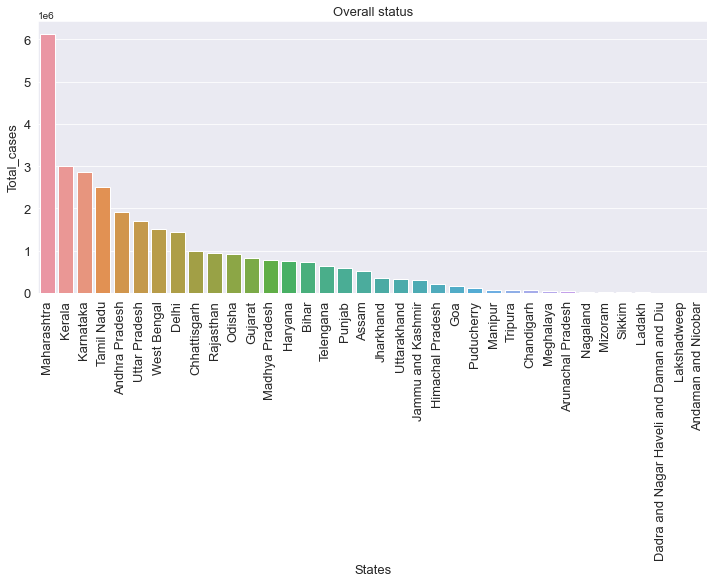

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(x="State/UTs",y="Total Cases",data=df)
plt.xticks(rotation=90,fontsize=13);
plt.yticks(fontsize=13)
plt.ylabel("Total_cases",fontsize=13)
plt.xlabel("States",fontsize=13)
plt.title("Overall status",fontsize=13);

### Top 5 deadly states

In [28]:
df1=df.sort_values(by="Total Cases",ascending=False).head()
df1

,State/UTs,Total Cases,Active,Deaths,Active Ratio (%),Death Ratio (%)
0,Maharashtra,6122893,117869,123857,1.93,2.02
1,Kerala,3011694,108400,14108,3.60,0.47
2,Karnataka,2862338,39626,35601,1.38,1.24
3,Tamil Nadu,2506848,34076,33196,1.36,1.32
4,Andhra Pradesh,1911231,32356,12919,1.69,0.68


### States condition in active and death case

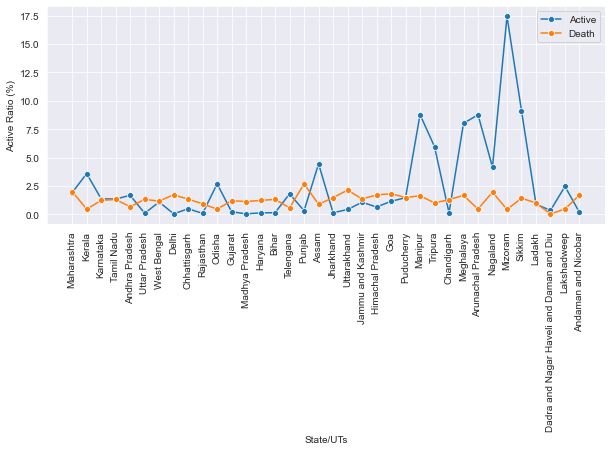

In [29]:
plt.figure(figsize=(10,4))
sns.lineplot(x="State/UTs",y="Active Ratio (%)",data=df,marker="o",label="Active")
sns.lineplot(x="State/UTs",y="Death Ratio (%)",data=df,marker="o",label="Death")
plt.xticks(rotation=90);


### Featuring engineering

#### Now adding new column of Total_case in percent

In [31]:
df["Total_case_in_%"]=df["Total Cases"].apply(lambda x:(x*100)/df["Total Cases"].sum())

In [32]:
df.head()

,State/UTs,Total Cases,Active,Deaths,Active Ratio (%),Death Ratio (%),Total_case_in_%
0,Maharashtra,6122893,117869,123857,1.93,2.02,19.938070
1,Kerala,3011694,108400,14108,3.60,0.47,9.807025
2,Karnataka,2862338,39626,35601,1.38,1.24,9.320675
3,Tamil Nadu,2506848,34076,33196,1.36,1.32,8.163087
4,Andhra Pradesh,1911231,32356,12919,1.69,0.68,6.223571


#### New columns with name condition

In [33]:
df["Condition"]=pd.cut(df["Total_case_in_%"],bins=[0,1,3,5,df["Total_case_in_%"].max()],labels=["Good_state","Normal_state","Bad_state","Worse_state"])

In [34]:
df.head()

,State/UTs,Total Cases,Active,Deaths,Active Ratio (%),Death Ratio (%),Total_case_in_%,Condition
0,Maharashtra,6122893,117869,123857,1.93,2.02,19.938070,Worse_state
1,Kerala,3011694,108400,14108,3.60,0.47,9.807025,Worse_state
2,Karnataka,2862338,39626,35601,1.38,1.24,9.320675,Worse_state
3,Tamil Nadu,2506848,34076,33196,1.36,1.32,8.163087,Worse_state
4,Andhra Pradesh,1911231,32356,12919,1.69,0.68,6.223571,Worse_state


### Evaluate the situation with the Condition column

In [35]:
value=df["Condition"].value_counts().values

In [36]:
lab=df["Condition"].value_counts().index

([<matplotlib.patches.Wedge at 0x516a16ed60>],
 [Text(-0.9900000000000001, 1.2124003311558797e-16, '')])

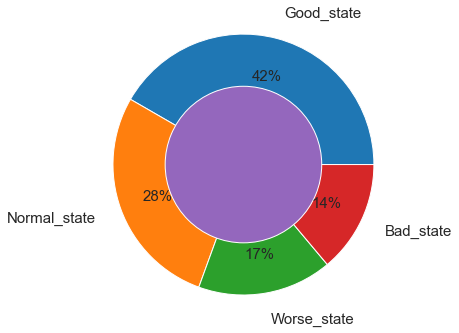

In [37]:
plt.pie(value,labels=lab,radius=1.5,autopct="%1.f%%",labeldistance=1.2,pctdistance=0.7,textprops={"fontsize":15});
plt.pie([4],radius=0.9)

### Insights

### Solution

In [ ]:
According to the case states should take the tough decisions
Announcement the lockdown
People should not be allowed to move around with any reason.
Promote the wearing face mask.
All time carry sanitizer.
While traveling maintain the social distance.
Take care of hygiene.
Spread the awarenes to taking the dose of vaccine and along with take away the misconceptions about the vaccinetion.